<a href="https://colab.research.google.com/github/rohitt-kumar/EDA-supermarket-analysis/blob/main/supermarket_sales_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\HP\Downloads\supermarket sales Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#Which gender spends more on Health and Beauty
df[df['Product line']=="Health and beauty"].groupby(['Product line','Gender']).count()['Invoice ID']

Product line       Gender
Health and beauty  Female    64
                   Male      88
Name: Invoice ID, dtype: int64

In [ ]:
#Which product line attracts more spending by women customers?
df[df['Gender']=="Female"].groupby(['Product line','Gender']).count()['Invoice ID']

Product line            Gender
Electronic accessories  Female    84
Fashion accessories     Female    96
Food and beverages      Female    90
Health and beauty       Female    64
Home and lifestyle      Female    79
Sports and travel       Female    88
Name: Invoice ID, dtype: int64

In [ ]:
#Which Gender uses more Ewallet
df[df['Payment']=='Ewallet'].groupby(['Payment','Gender']).count()['Invoice ID']

Payment  Gender
Ewallet  Female    160
         Male      185
Name: Invoice ID, dtype: int64

In [ ]:
#change datetype
df.Date = pd.to_datetime(df.Date)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
type(df.Date)

pandas.core.series.Series

In [ ]:
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['day'] = df.Date.dt.day
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,8


In [ ]:
#Which City produces most Sales(Total)
df.groupby(['Month','City']).max()['Total'].sort_values(ascending=False)

Month  City     
2      Naypyitaw    1042.650
       Yangon       1039.290
1      Naypyitaw    1034.460
3      Mandalay     1022.490
1      Mandalay     1022.385
3      Yangon        951.825
       Naypyitaw     943.299
1      Yangon        931.035
2      Mandalay      853.146
Name: Total, dtype: float64

In [ ]:
df['week'] = df.Date.dt.week

<ipython-input-12-a28b990c1402>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.Date.dt.week


In [ ]:
#Which day of week saw a greatest number of male customers as compared to number of male customers on other days?
df.groupby(['day','Gender']).max()['Total'].sort_values(ascending=False)

day  Gender
15   Female    1042.650
8    Male      1039.290
30   Female    1034.460
12   Male      1023.750
2    Female    1022.490
                 ...   
6    Female     580.419
18   Male       561.078
13   Male       536.844
21   Male       461.286
13   Female     437.325
Name: Total, Length: 62, dtype: float64

In [ ]:
df[df['Gender']=='Male'].groupby(['day','Gender']).count()['Total']

day  Gender
1    Male      12
2    Male      16
3    Male      21
4    Male      11
5    Male      14
6    Male      19
7    Male      20
8    Male      16
9    Male      20
10   Male      15
11   Male      12
12   Male      17
13   Male      14
14   Male      22
15   Male      24
16   Male      16
17   Male      15
18   Male       9
19   Male      22
20   Male      24
21   Male       7
22   Male      13
23   Male      16
24   Male      16
25   Male      24
26   Male      18
27   Male      18
28   Male      16
29   Male      13
30   Male       8
31   Male      11
Name: Total, dtype: int64

In [ ]:
#Electronic Accesories are bought mostly using which mode of payment
df[df['Product line']=="Electronic accessories"].groupby(['Product line','Payment']).count()['City'].sort_values(ascending=False)

Product line            Payment    
Electronic accessories  Cash           71
                        Ewallet        53
                        Credit card    46
Name: City, dtype: int64

In [ ]:
#What is the average rating Men of Yangon give to Electronic Accessories
df[(df['Product line']=='Electronic accessories') & (df.City=='Yangon') & (df.Gender=='Male')].groupby('Rating').mean().index

Float64Index([4.3, 4.7, 5.0, 5.1, 5.4, 5.5, 5.9, 6.0, 6.5, 6.7, 6.9, 7.2, 7.3,
              7.6, 7.8, 8.1, 8.8, 9.0, 9.3, 9.7, 9.8, 9.9],
             dtype='float64', name='Rating')

In [ ]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,day,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019,3,9


In [ ]:
df.Total

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

In [ ]:
df['gross income'].sum()

15379.368999999999

In [ ]:
#What is contribution of branch C of total sales?
df.groupby('Branch').cogs.sum().reset_index()

,Branch,cogs
0,A,101143.21
1,B,101140.64
2,C,105303.53


In [ ]:
df[df['Gender']=='Female'].groupby(['Time','Gender']).max()['Total']

Time   Gender
10:00  Female     76.3560
10:01  Female    120.6450
10:02  Female    310.5900
10:05  Female    216.4365
10:06  Female     68.2395
                   ...   
20:48  Female    180.6000
20:50  Female    293.2020
20:51  Female    833.9625
20:55  Female    783.3000
20:59  Female    138.1275
Name: Total, Length: 350, dtype: float64

In [ ]:
df[df['Gender']=='Female'].groupby('Gender').Time.max().reset_index()

,Gender,Time
0,Female,20:59


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,day,week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019,3,9
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,27,4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,8,6


In [ ]:
#What is the % of total spending by Member customer type for the entire time period?
df.groupby('Invoice ID')['Time'].max()

Invoice ID
101-17-6199    19:44
101-81-4070    12:36
102-06-2002    17:52
102-77-2261    18:02
105-10-6182    12:22
               ...  
894-41-5205    19:39
895-03-6665    10:52
895-66-0685    19:46
896-34-0956    12:43
898-04-2717    15:49
Name: Time, Length: 1000, dtype: object

In [ ]:
df.groupby('Gender').Rating.sum().reset_index()

,Gender,Rating
0,Female,3489.2
1,Male,3483.5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Rating'>

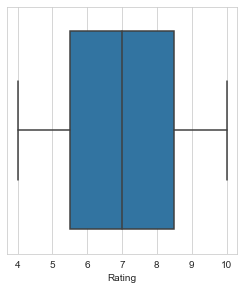

In [ ]:
#From the data what is the distribution of Rating?
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)

<AxesSubplot:xlabel='gross income'>

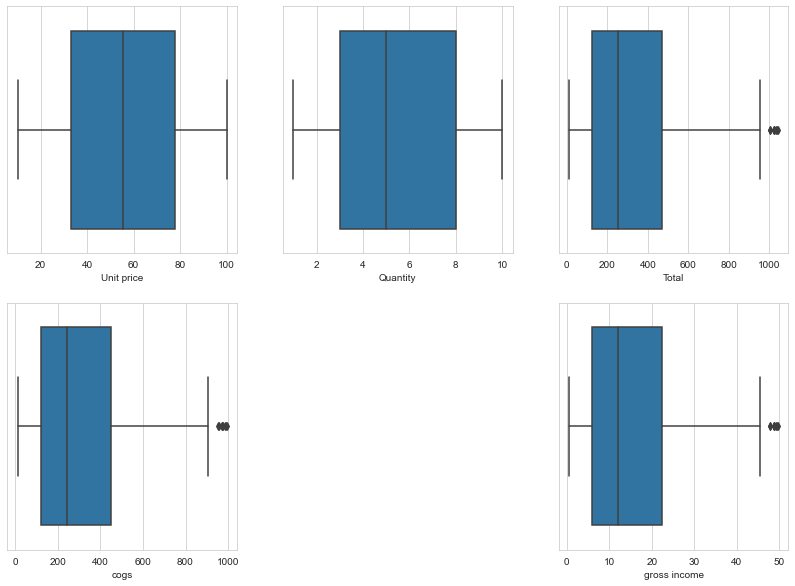

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)